# Fixed-Flat Appliance

Some appliances exhibit deterministic consumption patterns, such as security lights used for safety purposes, which often adhere to specific schedules. In RAMP, such appliances are categorized as **flat appliances** indicating they lack random variability in total usage time.

When multiple appliances of the same type are consistently switched on together, they can be attributed with the 'fixed' flag in their definition. This synchronizes the switch-on and switch-off events for appliances of the same type.

For instance, let's model the security lights of a school to illustrate these characteristics:

In [1]:
# importing functions
from ramp import User, UseCase
import pandas as pd
import matplotlib.pyplot as plt

### Creating a user

In [2]:
school = User(user_name="School", num_users=1)

### Adding an appliance with flat and fixed consumption

In [3]:
security_lights = school.add_appliance(
    name="Security Light Bulb",
    number=10,
    power=25,
    num_windows=1,
    func_time=210,
    func_cycle=60,
    fixed="yes",  # This means all the 'n' appliances of this kind are always switched-on together
    flat="yes",  # This means the appliance is not subject to random variability in terms of total usage time
    window_1=[1200, 1440],  # from 20:00 to 24:00
)

### Generating the profiles using UseCase class

Similar to previous example, you can generate the load profiles using the UseCase class. In this example, we use another functionality of the UseCase class by identifying the starting date of the simulation and the number of days for generating the profiles:

In [4]:
school_case = UseCase(
    users=[school],  # users of the usecase
    date_start="2023-01-01",  # start date
)

# when both date_start and date_end are not given, you need to initialize the usecase by this method and by passing the number of days as num_days
school_case.initialize(num_days=7)

You will simulate 7 day(s) from 2023-01-01 00:00:00 until 2023-01-08 00:00:00


<Axes: >

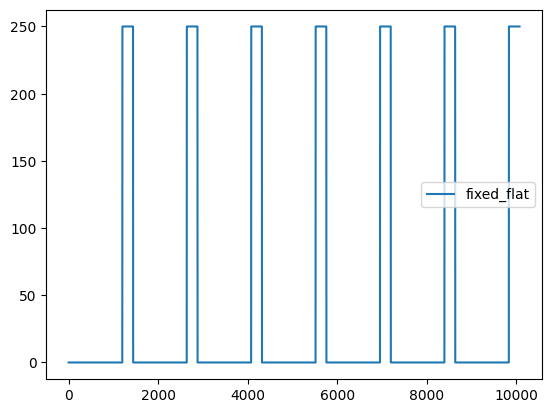

In [5]:
fixed_flat = school_case.generate_daily_load_profiles()
fixed_flat = pd.DataFrame(fixed_flat, columns=["fixed_flat"])
fixed_flat.plot()

As it can be seen, in each day, all the 10 lights with 25 Watt power (aggregated power of 250) are always switched on together on the specified schedule.

To clarify the impact of parameters, let's examine how the profiles would vary under different combinations:

1.  no_fixed_no_flat consumption: when appliances are not synchronized and they can randomly switch on during the window time

2. fixed_no_flat consumption: when appliances are synchronized and they can randomly switch on during the window time

3. fixed_flat consumption (original example): when appliances are synchronized and they are always switched on during the window time

4. no_fixed_flat consumption: when appliances are not synchronized but they are always switched on during the window time

By observing the load profiles generated under these different combinations, we can gain insights into how each parameter influences overall energy consumption and demand patterns within simulation.

In [6]:
# no fixed and no flat property
security_lights.fixed = "no"
security_lights.flat = "no"
no_fix_no_flat = school_case.generate_daily_load_profiles()
no_fix_no_flat = pd.DataFrame(no_fix_no_flat, columns=["no_fix_no_flat"])

# not flat but fixed
security_lights.fixed = "yes"
fix_no_flat = school_case.generate_daily_load_profiles()
fix_no_flat = pd.DataFrame(fix_no_flat, columns=["fix_no_flat"])

# not fixed but flat
security_lights.fixed = "no"
security_lights.flat = "yes"
no_fixed_flat = school_case.generate_daily_load_profiles()
no_fixed_flat = pd.DataFrame(no_fixed_flat, columns=["no_fixed_flat"])

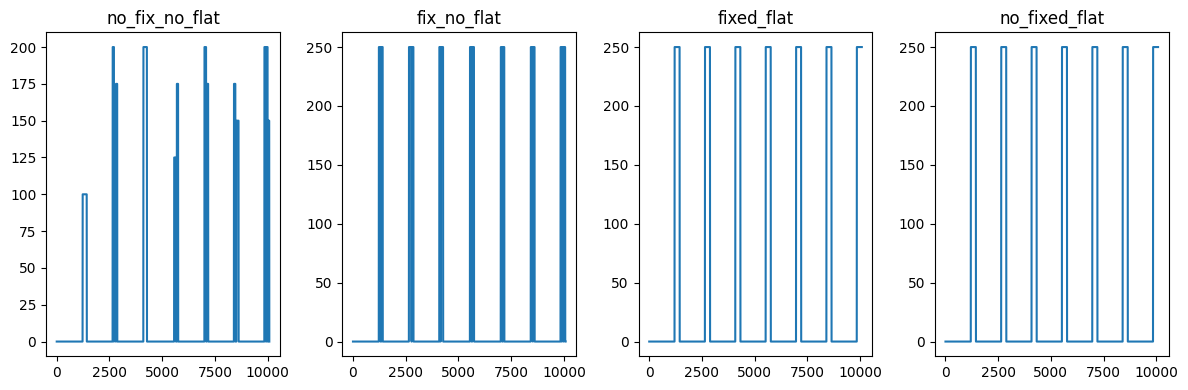

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))


for i, df in enumerate([no_fix_no_flat, fix_no_flat, fixed_flat, no_fixed_flat]):
    df.plot(ax=axes[i], legend=False)
    axes[i].set_title(df.columns[0])


plt.tight_layout()
plt.show()

As it can be seen, in case of no flat and no fix, both scheduling of appliances and the switched on events of appliances are randomized. While when appliances are fixed, not flat, their scheduling is randomized keeping their switch on events synced as it can be observed that power usage is always kept at 250 Watt with more intermittent swithced on/off events. 